Dou et al. (2020) model solved in parallel

Estimation using Coupled Simulated Annealing, from Xavier et al. (2010).

Agora em Julia versão 1.5.3

This script only solves the model. For a version with unit testing and graphs, refer to "BargainingJulia"



Version to use at HPC - aguia4

Número de simulações = length(pids) * 5

Código para fazer cálculos em duplas

In [15]:
using DataFrames, LinearAlgebra, Statistics, Distributions

## Dissecando funções para gerar draws

In [285]:


#bounds for g
#ρ, β, c0, λj###
lg = [0.4, 1.0, 0.01, 0.01]
ug = [0.93, 16.0, 0.6, 0.99]
#ρ was limited at 0.93 because a higher value would create more periods and calculations would take longer than we could afford.

g = lg .+ (ug .- lg)/2;




#bounds for s
#θs0, θj0, μ###
#μ can be 0.5 month or 18 months
ls = [10, 10, 0.5] 
us = [50, 50, 18]

s = ls .+ (us .- ls)/2;


Kmax = 1000
T0 = 10000
alpha = 0.05

0.05

In [286]:
g

4-element Array{Float64,1}:
 0.665
 8.5
 0.305
 0.5

In [287]:
s

3-element Array{Float64,1}:
 30.0
 30.0
  9.25

### 1 Função que estava padrão no código de SA

In [288]:
using Gadfly, StatsBase

In [346]:
function mu_inv(y, mu)
    
    
    #entender porque tem 1 somando em mu
    #entender porque tem 1 subtraindo de abs(y)
    x = (((1 .+ mu) .^ abs.(y) .- 1)/mu) .* sign.(y)
    
    return x
    
end 

mu_inv (generic function with 1 method)

In [347]:
mu = T0*1000

10000000

In [348]:
#we generate new gtest points using mu_inv function
dg = mu_inv(2 .* rand(size(g,1)) .- 1, mu) .* (ug .- lg)

4-element Array{Float64,1}:
 -0.000505398876071873
 -0.00016366820210446305
  1.0030638707472979e-5
  1.3991598496971208e-5

In [349]:
#testando a variância dos chutes usando Kmax e o sistema de arrefecimento
nd = 3;

G = zeros(Kmax, size(g,1))

T = T0

D = size(g,1) + size(s,1)
for k in 1:Kmax
    
    dg = mu_inv(2 .* rand(size(g,1)) .- 1, mu) .* (ug .- lg)
    
    gtest = g .+ dg

    #next step is to keep solution within bounds
    gtest = round.(gtest, digits=nd)

    gtest = (gtest .< lg) .* lg .+ (lg .<= gtest) .* (gtest .<= ug) .* gtest .+ (ug .< gtest) .* ug
    
    G[k, :] = gtest
    
    @show T = T0/(k+1)
    
end

T = T0 / (k + 1) = 5000.0
T = T0 / (k + 1) = 3333.3333333333335
T = T0 / (k + 1) = 2500.0
T = T0 / (k + 1) = 2000.0
T = T0 / (k + 1) = 1666.6666666666667
T = T0 / (k + 1) = 1428.5714285714287
T = T0 / (k + 1) = 1250.0
T = T0 / (k + 1) = 1111.111111111111
T = T0 / (k + 1) = 1000.0
T = T0 / (k + 1) = 909.0909090909091
T = T0 / (k + 1) = 833.3333333333334
T = T0 / (k + 1) = 769.2307692307693
T = T0 / (k + 1) = 714.2857142857143
T = T0 / (k + 1) = 666.6666666666666
T = T0 / (k + 1) = 625.0
T = T0 / (k + 1) = 588.2352941176471
T = T0 / (k + 1) = 555.5555555555555
T = T0 / (k + 1) = 526.3157894736842
T = T0 / (k + 1) = 500.0
T = T0 / (k + 1) = 476.1904761904762
T = T0 / (k + 1) = 454.54545454545456
T = T0 / (k + 1) = 434.7826086956522
T = T0 / (k + 1) = 416.6666666666667
T = T0 / (k + 1) = 400.0
T = T0 / (k + 1) = 384.61538461538464
T = T0 / (k + 1) = 370.3703703703704
T = T0 / (k + 1) = 357.14285714285717
T = T0 / (k + 1) = 344.82758620689657
T = T0 / (k + 1) = 333.3333333333333
T = T0 / (k

T = T0 / (k + 1) = 39.52569169960474
T = T0 / (k + 1) = 39.37007874015748
T = T0 / (k + 1) = 39.21568627450981
T = T0 / (k + 1) = 39.0625
T = T0 / (k + 1) = 38.91050583657587
T = T0 / (k + 1) = 38.75968992248062
T = T0 / (k + 1) = 38.61003861003861
T = T0 / (k + 1) = 38.46153846153846
T = T0 / (k + 1) = 38.31417624521073
T = T0 / (k + 1) = 38.16793893129771
T = T0 / (k + 1) = 38.02281368821293
T = T0 / (k + 1) = 37.878787878787875
T = T0 / (k + 1) = 37.735849056603776
T = T0 / (k + 1) = 37.59398496240601
T = T0 / (k + 1) = 37.453183520599254
T = T0 / (k + 1) = 37.3134328358209
T = T0 / (k + 1) = 37.174721189591075
T = T0 / (k + 1) = 37.03703703703704
T = T0 / (k + 1) = 36.90036900369004
T = T0 / (k + 1) = 36.76470588235294
T = T0 / (k + 1) = 36.63003663003663
T = T0 / (k + 1) = 36.496350364963504
T = T0 / (k + 1) = 36.36363636363637
T = T0 / (k + 1) = 36.231884057971016
T = T0 / (k + 1) = 36.101083032490976
T = T0 / (k + 1) = 35.97122302158273
T = T0 / (k + 1) = 35.842293906810035
T = 

T = T0 / (k + 1) = 19.723865877712033
T = T0 / (k + 1) = 19.68503937007874
T = T0 / (k + 1) = 19.64636542239686
T = T0 / (k + 1) = 19.607843137254903
T = T0 / (k + 1) = 19.569471624266146
T = T0 / (k + 1) = 19.53125
T = T0 / (k + 1) = 19.49317738791423
T = T0 / (k + 1) = 19.455252918287936
T = T0 / (k + 1) = 19.41747572815534
T = T0 / (k + 1) = 19.37984496124031
T = T0 / (k + 1) = 19.342359767891683
T = T0 / (k + 1) = 19.305019305019304
T = T0 / (k + 1) = 19.26782273603083
T = T0 / (k + 1) = 19.23076923076923
T = T0 / (k + 1) = 19.193857965451055
T = T0 / (k + 1) = 19.157088122605366
T = T0 / (k + 1) = 19.120458891013385
T = T0 / (k + 1) = 19.083969465648856
T = T0 / (k + 1) = 19.047619047619047
T = T0 / (k + 1) = 19.011406844106464
T = T0 / (k + 1) = 18.975332068311197
T = T0 / (k + 1) = 18.939393939393938
T = T0 / (k + 1) = 18.90359168241966
T = T0 / (k + 1) = 18.867924528301888
T = T0 / (k + 1) = 18.832391713747647
T = T0 / (k + 1) = 18.796992481203006
T = T0 / (k + 1) = 18.76172607

T = T0 / (k + 1) = 13.58695652173913
T = T0 / (k + 1) = 13.568521031207599
T = T0 / (k + 1) = 13.550135501355014
T = T0 / (k + 1) = 13.531799729364005
T = T0 / (k + 1) = 13.513513513513514
T = T0 / (k + 1) = 13.49527665317139
T = T0 / (k + 1) = 13.477088948787062
T = T0 / (k + 1) = 13.458950201884253
T = T0 / (k + 1) = 13.440860215053764
T = T0 / (k + 1) = 13.422818791946309
T = T0 / (k + 1) = 13.404825737265416
T = T0 / (k + 1) = 13.386880856760374
T = T0 / (k + 1) = 13.368983957219251
T = T0 / (k + 1) = 13.35113484646195
T = T0 / (k + 1) = 13.333333333333334
T = T0 / (k + 1) = 13.315579227696405
T = T0 / (k + 1) = 13.297872340425531
T = T0 / (k + 1) = 13.280212483399735
T = T0 / (k + 1) = 13.26259946949602
T = T0 / (k + 1) = 13.245033112582782
T = T0 / (k + 1) = 13.227513227513228
T = T0 / (k + 1) = 13.21003963011889
T = T0 / (k + 1) = 13.192612137203167
T = T0 / (k + 1) = 13.175230566534914
T = T0 / (k + 1) = 13.157894736842104
T = T0 / (k + 1) = 13.140604467805518
T = T0 / (k + 1) 

T = T0 / (k + 1) = 10.26694045174538
T = T0 / (k + 1) = 10.256410256410257
T = T0 / (k + 1) = 10.245901639344263
T = T0 / (k + 1) = 10.235414534288639
T = T0 / (k + 1) = 10.224948875255624
T = T0 / (k + 1) = 10.21450459652707
T = T0 / (k + 1) = 10.204081632653061
T = T0 / (k + 1) = 10.193679918450561
T = T0 / (k + 1) = 10.183299389002036
T = T0 / (k + 1) = 10.172939979654121
T = T0 / (k + 1) = 10.16260162601626
T = T0 / (k + 1) = 10.152284263959391
T = T0 / (k + 1) = 10.141987829614605
T = T0 / (k + 1) = 10.131712259371835
T = T0 / (k + 1) = 10.121457489878543
T = T0 / (k + 1) = 10.111223458038422
T = T0 / (k + 1) = 10.1010101010101
T = T0 / (k + 1) = 10.090817356205852
T = T0 / (k + 1) = 10.080645161290322
T = T0 / (k + 1) = 10.070493454179255
T = T0 / (k + 1) = 10.060362173038229
T = T0 / (k + 1) = 10.050251256281408
T = T0 / (k + 1) = 10.040160642570282
T = T0 / (k + 1) = 10.030090270812437
T = T0 / (k + 1) = 10.02004008016032
T = T0 / (k + 1) = 10.01001001001001
T = T0 / (k + 1) = 

g[1] = 0.665


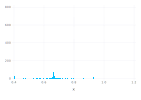

In [351]:
@show g[1]

plot(x=G[:,1], Geom.histogram)

In [352]:
summarystats(G[:,1])

Summary Stats:
Length:         1000
Missing Count:  0
Mean:           0.664359
Minimum:        0.400000
1st Quartile:   0.665000
Median:         0.665000
3rd Quartile:   0.665000
Maximum:        0.930000


In [353]:
@show var(G[:,1])
@show std(G[:,1])

var(G[:, 1]) = 0.005149801920920924
std(G[:, 1]) = 0.07176212037642786


0.07176212037642786

## ndraws da Cauchy univariada, criticada por Ingber (1989)

In [354]:
#funçao de resfriamento de Ingber (1989) para draws usando cauchy independentes

function T0_cauchy(TF, D, k)
    #retorna a temperatura inicial máxima com base na temperatura final desejada
    
    T0 = TF * ((k)^(1/D))
    
    return T0
end
    
@show T0_max = T0_cauchy(0.01, 7, 1000)


#e se for multivariada?
# @show T0 = 1 * 1000

#ou seja, dá problema se eu precisar começar com uma temperatura alta

T0_max = T0_cauchy(0.01, 7, 1000) = 0.026826957952797256


0.026826957952797256

In [355]:
#testando draws da Cauchy univariada quando a temperatura inicial é 0.0268
d = Cauchy(0, 0.01)

@show ug
@show lg

@show ug .* 0.01

rand(d, size(g,1)) .* (ug .- lg)

ug = [0.93, 16.0, 0.6, 0.99]
lg = [0.4, 1.0, 0.01, 0.01]
ug .* 0.01 = [0.009300000000000001, 0.16, 0.006, 0.0099]


4-element Array{Float64,1}:
 -0.015996358615238807
 -0.017676928836396936
 -0.003222976050430778
  0.03675868557133009

In [356]:
G = zeros(Kmax, size(g,1))


T = T0_max
cauchy = Cauchy(0, T)

D = size(g,1) + size(s,1)
for k in 1:Kmax
    
    dg = rand(cauchy, size(g,1)) #cauchy não precisa normalizar pelos bounds  
    gtest = g .+ dg

    #next step is to keep solution within bounds
    gtest = round.(gtest, digits=nd)

    gtest = (gtest .< lg) .* lg .+ (lg .<= gtest) .* (gtest .<= ug) .* gtest .+ (ug .< gtest) .* ug
    
    G[k, :] = gtest
    
    @show T = T0_max/((k)^(1/D))
    
    cauchy = Cauchy(0, T)
end

T = T0_max / k ^ (1 / D) = 0.026826957952797256
T = T0_max / k ^ (1 / D) = 0.024297810658061286
T = T0_max / k ^ (1 / D) = 0.022930379865403763
T = T0_max / k ^ (1 / D) = 0.022007102102809872
T = T0_max / k ^ (1 / D) = 0.021316631165338416
T = T0_max / k ^ (1 / D) = 0.020768587674656804
T = T0_max / k ^ (1 / D) = 0.020316230762953674
T = T0_max / k ^ (1 / D) = 0.019932353156386882
T = T0_max / k ^ (1 / D) = 0.019599774290356645
T = T0_max / k ^ (1 / D) = 0.0193069772888325
T = T0_max / k ^ (1 / D) = 0.019045880056122396
T = T0_max / k ^ (1 / D) = 0.018810601330276372
T = T0_max / k ^ (1 / D) = 0.018596733349527696
T = T0_max / k ^ (1 / D) = 0.0184008909706535
T = T0_max / k ^ (1 / D) = 0.01822042032987744
T = T0_max / k ^ (1 / D) = 0.018053203938204972
T = T0_max / k ^ (1 / D) = 0.01789752638059393
T = T0_max / k ^ (1 / D) = 0.01775197938900733
T = T0_max / k ^ (1 / D) = 0.017615393242207022
T = T0_max / k ^ (1 / D) = 0.0174867862159014
T = T0_max / k ^ (1 / D) = 0.017365326685471402
T

T = T0_max / k ^ (1 / D) = 0.012463934993322597
T = T0_max / k ^ (1 / D) = 0.012455636752909888
T = T0_max / k ^ (1 / D) = 0.012447382505964732
T = T0_max / k ^ (1 / D) = 0.012439171817193475
T = T0_max / k ^ (1 / D) = 0.012431004257590382
T = T0_max / k ^ (1 / D) = 0.012422879404318481
T = T0_max / k ^ (1 / D) = 0.012414796840593146
T = T0_max / k ^ (1 / D) = 0.01240675615556843
T = T0_max / k ^ (1 / D) = 0.012398756944226028
T = T0_max / k ^ (1 / D) = 0.012390798807266795
T = T0_max / k ^ (1 / D) = 0.012382881351004767
T = T0_max / k ^ (1 / D) = 0.012375004187263621
T = T0_max / k ^ (1 / D) = 0.012367166933275468
T = T0_max / k ^ (1 / D) = 0.01235936921158197
T = T0_max / k ^ (1 / D) = 0.012351610649937677
T = T0_max / k ^ (1 / D) = 0.012343890881215541
T = T0_max / k ^ (1 / D) = 0.012336209543314556
T = T0_max / k ^ (1 / D) = 0.012328566279069433
T = T0_max / k ^ (1 / D) = 0.01232096073616233
T = T0_max / k ^ (1 / D) = 0.012313392567036464
T = T0_max / k ^ (1 / D) = 0.01230586142881

T = T0_max / k ^ (1 / D) = 0.011435639687923303
T = T0_max / k ^ (1 / D) = 0.011431467617227416
T = T0_max / k ^ (1 / D) = 0.011427307692309825
T = T0_max / k ^ (1 / D) = 0.011423159847040974
T = T0_max / k ^ (1 / D) = 0.01141902401581804
T = T0_max / k ^ (1 / D) = 0.011414900133559423
T = T0_max / k ^ (1 / D) = 0.0114107881356993
T = T0_max / k ^ (1 / D) = 0.011406687958182254
T = T0_max / k ^ (1 / D) = 0.011402599537457965
T = T0_max / k ^ (1 / D) = 0.011398522810475969
T = T0_max / k ^ (1 / D) = 0.011394457714680494
T = T0_max / k ^ (1 / D) = 0.01139040418800536
T = T0_max / k ^ (1 / D) = 0.011386362168868932
T = T0_max / k ^ (1 / D) = 0.01138233159616915
T = T0_max / k ^ (1 / D) = 0.011378312409278614
T = T0_max / k ^ (1 / D) = 0.011374304548039749
T = T0_max / k ^ (1 / D) = 0.011370307952759999
T = T0_max / k ^ (1 / D) = 0.01136632256420711
T = T0_max / k ^ (1 / D) = 0.011362348323604467
T = T0_max / k ^ (1 / D) = 0.011358385172626476
T = T0_max / k ^ (1 / D) = 0.01135443305339401

T = T0_max / k ^ (1 / D) = 0.01080926093760025
T = T0_max / k ^ (1 / D) = 0.010806601177867034
T = T0_max / k ^ (1 / D) = 0.01080394664488093
T = T0_max / k ^ (1 / D) = 0.010801297319416524
T = T0_max / k ^ (1 / D) = 0.010798653182351934
T = T0_max / k ^ (1 / D) = 0.010796014214668085
T = T0_max / k ^ (1 / D) = 0.010793380397447986
T = T0_max / k ^ (1 / D) = 0.010790751711875997
T = T0_max / k ^ (1 / D) = 0.010788128139237126
T = T0_max / k ^ (1 / D) = 0.01078550966091631
T = T0_max / k ^ (1 / D) = 0.010782896258397725
T = T0_max / k ^ (1 / D) = 0.010780287913264075
T = T0_max / k ^ (1 / D) = 0.010777684607195921
T = T0_max / k ^ (1 / D) = 0.010775086321970974
T = T0_max / k ^ (1 / D) = 0.010772493039463437
T = T0_max / k ^ (1 / D) = 0.010769904741643323
T = T0_max / k ^ (1 / D) = 0.01076732141057579
T = T0_max / k ^ (1 / D) = 0.010764743028420476
T = T0_max / k ^ (1 / D) = 0.010762169577430855
T = T0_max / k ^ (1 / D) = 0.01075960103995358
T = T0_max / k ^ (1 / D) = 0.0107570373984278

T = T0_max / k ^ (1 / D) = 0.010353750738189406
T = T0_max / k ^ (1 / D) = 0.010351865495634525
T = T0_max / k ^ (1 / D) = 0.010349982995749983
T = T0_max / k ^ (1 / D) = 0.010348103231063915
T = T0_max / k ^ (1 / D) = 0.010346226194134278
T = T0_max / k ^ (1 / D) = 0.01034435187754869
T = T0_max / k ^ (1 / D) = 0.010342480273924265
T = T0_max / k ^ (1 / D) = 0.010340611375907478
T = T0_max / k ^ (1 / D) = 0.010338745176173997
T = T0_max / k ^ (1 / D) = 0.010336881667428532
T = T0_max / k ^ (1 / D) = 0.010335020842404681
T = T0_max / k ^ (1 / D) = 0.010333162693864797
T = T0_max / k ^ (1 / D) = 0.010331307214599812
T = T0_max / k ^ (1 / D) = 0.010329454397429105
T = T0_max / k ^ (1 / D) = 0.010327604235200355
T = T0_max / k ^ (1 / D) = 0.010325756720789383
T = T0_max / k ^ (1 / D) = 0.010323911847100017
T = T0_max / k ^ (1 / D) = 0.010322069607063942
T = T0_max / k ^ (1 / D) = 0.010320229993640557
T = T0_max / k ^ (1 / D) = 0.010318392999816831
T = T0_max / k ^ (1 / D) = 0.010316558618

T = T0_max / k ^ (1 / D) = 0.010034764134095573
T = T0_max / k ^ (1 / D) = 0.010033296204751936
T = T0_max / k ^ (1 / D) = 0.010031829991532315
T = T0_max / k ^ (1 / D) = 0.010030365490678771
T = T0_max / k ^ (1 / D) = 0.010028902698445424
T = T0_max / k ^ (1 / D) = 0.010027441611098403
T = T0_max / k ^ (1 / D) = 0.010025982224915787
T = T0_max / k ^ (1 / D) = 0.010024524536187565
T = T0_max / k ^ (1 / D) = 0.010023068541215575
T = T0_max / k ^ (1 / D) = 0.010021614236313467
T = T0_max / k ^ (1 / D) = 0.01002016161780664
T = T0_max / k ^ (1 / D) = 0.010018710682032205
T = T0_max / k ^ (1 / D) = 0.010017261425338922
T = T0_max / k ^ (1 / D) = 0.010015813844087167
T = T0_max / k ^ (1 / D) = 0.010014367934648868
T = T0_max / k ^ (1 / D) = 0.010012923693407472
T = T0_max / k ^ (1 / D) = 0.01001148111675788
T = T0_max / k ^ (1 / D) = 0.01001004020110642
T = T0_max / k ^ (1 / D) = 0.01000860094287077
T = T0_max / k ^ (1 / D) = 0.01000716333847995
T = T0_max / k ^ (1 / D) = 0.0100057273843742

In [357]:
ug[1]

0.93

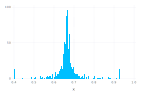

In [358]:
plot(x=G[:,1], Geom.histogram)

In [359]:
summarystats(G[:,1])

Summary Stats:
Length:         1000
Missing Count:  0
Mean:           0.664822
Minimum:        0.400000
1st Quartile:   0.652000
Median:         0.665000
3rd Quartile:   0.676000
Maximum:        0.930000


In [360]:
G[:,1]

1000-element Array{Float64,1}:
 0.683
 0.742
 0.664
 0.669
 0.664
 0.4
 0.537
 0.716
 0.653
 0.667
 0.683
 0.663
 0.694
 ⋮
 0.662
 0.583
 0.673
 0.667
 0.763
 0.672
 0.672
 0.661
 0.673
 0.663
 0.568
 0.663

In [361]:
@show var(G[:, 1])
@show std(G[:, 1])

var(G[:, 1]) = 0.0037174837997998008
std(G[:, 1]) = 0.06097117187490987

0.06097117187490987

### Gerando valores pelo método sugerido por Ingber

In [362]:
function ingber(t, n)
    #t é temperatura
    #n é o número de draws
    
    u = rand(n)
    
    y = sign.(u .- 1/2) .* t .* ((1 .+ 1 ./ t).^(abs.(2 .* u .- 1)) .-1)
end
    

ingber (generic function with 1 method)

In [363]:
ingber(T0, 4) .* (ug .- lg)

4-element Array{Float64,1}:
  0.05965223959925048
  1.0635394104396845
 -0.29456831947047846
  0.8467854375822093

In [364]:
G = zeros(Kmax, size(g,1))


T = T0

D = size(g,1) + size(s,1)
for k in 1:Kmax
    
    dg = ingber(T, size(g,1)) .* (ug .- lg)
    
    gtest = g .+ dg

    #next step is to keep solution within bounds
    gtest = round.(gtest, digits=nd)

    gtest = (gtest .< lg) .* lg .+ (lg .<= gtest) .* (gtest .<= ug) .* gtest .+ (ug .< gtest) .* ug
    
    G[k, :] = gtest
    
    @show T = T0 * exp(-k^(1/D))
    
end

T = T0 * exp(-(k ^ (1 / D))) = 3678.7944117144234
T = T0 * exp(-(k ^ (1 / D))) = 3315.125825475062
T = T0 * exp(-(k ^ (1 / D))) = 3103.8841544080688
T = T0 * exp(-(k ^ (1 / D))) = 2955.2150961657157
T = T0 * exp(-(k ^ (1 / D))) = 2840.8012491155964
T = T0 * exp(-(k ^ (1 / D))) = 2748.009278756368
T = T0 * exp(-(k ^ (1 / D))) = 2670.0997873094443
T = T0 * exp(-(k ^ (1 / D))) = 2603.052774666111
T = T0 * exp(-(k ^ (1 / D))) = 2544.2781783912324
T = T0 * exp(-(k ^ (1 / D))) = 2492.0099622776006
T = T0 * exp(-(k ^ (1 / D))) = 2444.990419624929
T = T0 * exp(-(k ^ (1 / D))) = 2402.2924231280913
T = T0 * exp(-(k ^ (1 / D))) = 2363.2130939510666
T = T0 * exp(-(k ^ (1 / D))) = 2327.20701702802
T = T0 * exp(-(k ^ (1 / D))) = 2293.8425776020445
T = T0 * exp(-(k ^ (1 / D))) = 2262.772437838827
T = T0 * exp(-(k ^ (1 / D))) = 2233.712994732984
T = T0 * exp(-(k ^ (1 / D))) = 2206.4297301776687
T = T0 * exp(-(k ^ (1 / D))) = 2180.726536224704
T = T0 * exp(-(k ^ (1 / D))) = 2156.4377885763874
T = T0 * 

T = T0 * exp(-(k ^ (1 / D))) = 1218.7213467827637
T = T0 * exp(-(k ^ (1 / D))) = 1216.725202920118
T = T0 * exp(-(k ^ (1 / D))) = 1214.7415830393134
T = T0 * exp(-(k ^ (1 / D))) = 1212.7703439843515
T = T0 * exp(-(k ^ (1 / D))) = 1210.8113449802222
T = T0 * exp(-(k ^ (1 / D))) = 1208.8644475809667
T = T0 * exp(-(k ^ (1 / D))) = 1206.9295156191397
T = T0 * exp(-(k ^ (1 / D))) = 1205.006415156627
T = T0 * exp(-(k ^ (1 / D))) = 1203.0950144367744
T = T0 * exp(-(k ^ (1 / D))) = 1201.1951838377875
T = T0 * exp(-(k ^ (1 / D))) = 1199.3067958273625
T = T0 * exp(-(k ^ (1 / D))) = 1197.429724918508
T = T0 * exp(-(k ^ (1 / D))) = 1195.5638476265194
T = T0 * exp(-(k ^ (1 / D))) = 1193.7090424270768
T = T0 * exp(-(k ^ (1 / D))) = 1191.8651897154207
T = T0 * exp(-(k ^ (1 / D))) = 1190.0321717665843
T = T0 * exp(-(k ^ (1 / D))) = 1188.2098726966378
T = T0 * exp(-(k ^ (1 / D))) = 1186.3981784249274
T = T0 * exp(-(k ^ (1 / D))) = 1184.5969766372664
T = T0 * exp(-(k ^ (1 / D))) = 1182.8061567500554
T =

T = T0 * exp(-(k ^ (1 / D))) = 967.6356805010678
T = T0 * exp(-(k ^ (1 / D))) = 966.7851886619245
T = T0 * exp(-(k ^ (1 / D))) = 965.937358072253
T = T0 * exp(-(k ^ (1 / D))) = 965.0921737306506
T = T0 * exp(-(k ^ (1 / D))) = 964.2496207584802
T = T0 * exp(-(k ^ (1 / D))) = 963.409684398549
T = T0 * exp(-(k ^ (1 / D))) = 962.5723500138125
T = T0 * exp(-(k ^ (1 / D))) = 961.7376030860875
T = T0 * exp(-(k ^ (1 / D))) = 960.9054292147864
T = T0 * exp(-(k ^ (1 / D))) = 960.075814115671
T = T0 * exp(-(k ^ (1 / D))) = 959.2487436196149
T = T0 * exp(-(k ^ (1 / D))) = 958.4242036713887
T = T0 * exp(-(k ^ (1 / D))) = 957.6021803284596
T = T0 * exp(-(k ^ (1 / D))) = 956.7826597598045
T = T0 * exp(-(k ^ (1 / D))) = 955.9656282447411
T = T0 * exp(-(k ^ (1 / D))) = 955.1510721717726
T = T0 * exp(-(k ^ (1 / D))) = 954.3389780374491
T = T0 * exp(-(k ^ (1 / D))) = 953.5293324452397
T = T0 * exp(-(k ^ (1 / D))) = 952.7221221044258
T = T0 * exp(-(k ^ (1 / D))) = 951.9173338290013
T = T0 * exp(-(k ^ (1 /

T = T0 * exp(-(k ^ (1 / D))) = 829.3310737730249
T = T0 * exp(-(k ^ (1 / D))) = 828.8341588090788
T = T0 * exp(-(k ^ (1 / D))) = 828.3382574732592
T = T0 * exp(-(k ^ (1 / D))) = 827.8433660706662
T = T0 * exp(-(k ^ (1 / D))) = 827.349480925907
T = T0 * exp(-(k ^ (1 / D))) = 826.8565983829621
T = T0 * exp(-(k ^ (1 / D))) = 826.3647148050496
T = T0 * exp(-(k ^ (1 / D))) = 825.8738265744929
T = T0 * exp(-(k ^ (1 / D))) = 825.3839300925898
T = T0 * exp(-(k ^ (1 / D))) = 824.8950217794818
T = T0 * exp(-(k ^ (1 / D))) = 824.4070980740247
T = T0 * exp(-(k ^ (1 / D))) = 823.9201554336606
T = T0 * exp(-(k ^ (1 / D))) = 823.4341903342894
T = T0 * exp(-(k ^ (1 / D))) = 822.949199270145
T = T0 * exp(-(k ^ (1 / D))) = 822.4651787536685
T = T0 * exp(-(k ^ (1 / D))) = 821.9821253153851
T = T0 * exp(-(k ^ (1 / D))) = 821.5000355037807
T = T0 * exp(-(k ^ (1 / D))) = 821.0189058851795
T = T0 * exp(-(k ^ (1 / D))) = 820.5387330436254
T = T0 * exp(-(k ^ (1 / D))) = 820.0595135807597
T = T0 * exp(-(k ^ (1 

T = T0 * exp(-(k ^ (1 / D))) = 749.0688147277335
T = T0 * exp(-(k ^ (1 / D))) = 748.7158205863309
T = T0 * exp(-(k ^ (1 / D))) = 748.3633772543191
T = T0 * exp(-(k ^ (1 / D))) = 748.0114832040468
T = T0 * exp(-(k ^ (1 / D))) = 747.6601369139881
T = T0 * exp(-(k ^ (1 / D))) = 747.3093368687101
T = T0 * exp(-(k ^ (1 / D))) = 746.9590815588423
T = T0 * exp(-(k ^ (1 / D))) = 746.6093694810435
T = T0 * exp(-(k ^ (1 / D))) = 746.2601991379709
T = T0 * exp(-(k ^ (1 / D))) = 745.9115690382482
T = T0 * exp(-(k ^ (1 / D))) = 745.5634776964364
T = T0 * exp(-(k ^ (1 / D))) = 745.2159236329998
T = T0 * exp(-(k ^ (1 / D))) = 744.8689053742766
T = T0 * exp(-(k ^ (1 / D))) = 744.5224214524499
T = T0 * exp(-(k ^ (1 / D))) = 744.1764704055153
T = T0 * exp(-(k ^ (1 / D))) = 743.8310507772511
T = T0 * exp(-(k ^ (1 / D))) = 743.486161117189
T = T0 * exp(-(k ^ (1 / D))) = 743.141799980584
T = T0 * exp(-(k ^ (1 / D))) = 742.7979659283845
T = T0 * exp(-(k ^ (1 / D))) = 742.4546575272035
T = T0 * exp(-(k ^ (1 

T = T0 * exp(-(k ^ (1 / D))) = 690.4405726436485
T = T0 * exp(-(k ^ (1 / D))) = 690.1703333589261
T = T0 * exp(-(k ^ (1 / D))) = 689.9004369324267
T = T0 * exp(-(k ^ (1 / D))) = 689.6308825943123
T = T0 * exp(-(k ^ (1 / D))) = 689.3616695772408
T = T0 * exp(-(k ^ (1 / D))) = 689.0927971163554
T = T0 * exp(-(k ^ (1 / D))) = 688.8242644492736
T = T0 * exp(-(k ^ (1 / D))) = 688.5560708160767
T = T0 * exp(-(k ^ (1 / D))) = 688.2882154592993
T = T0 * exp(-(k ^ (1 / D))) = 688.0206976239192
T = T0 * exp(-(k ^ (1 / D))) = 687.7535165573471
T = T0 * exp(-(k ^ (1 / D))) = 687.4866715094166
T = T0 * exp(-(k ^ (1 / D))) = 687.2201617323728
T = T0 * exp(-(k ^ (1 / D))) = 686.9539864808637
T = T0 * exp(-(k ^ (1 / D))) = 686.6881450119289
T = T0 * exp(-(k ^ (1 / D))) = 686.42263658499
T = T0 * exp(-(k ^ (1 / D))) = 686.1574604618414
T = T0 * exp(-(k ^ (1 / D))) = 685.8926159066388
T = T0 * exp(-(k ^ (1 / D))) = 685.62810218589
T = T0 * exp(-(k ^ (1 / D))) = 685.3639185684456
T = T0 * exp(-(k ^ (1 / 

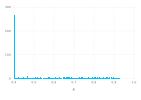

In [365]:
plot(x=G[:,1], Geom.histogram)

In [366]:
summarystats(G[:,1])

Summary Stats:
Length:         1000
Missing Count:  0
Mean:           0.662498
Minimum:        0.400000
1st Quartile:   0.400000
Median:         0.663500
3rd Quartile:   0.930000
Maximum:        0.930000


In [367]:
@show var(G[:, 1])
@show std(G[:, 1])

var(G[:, 1]) = 0.047933269265265234
std(G[:, 1]) = 0.21893667866592212


0.21893667866592212

### Gerando valores de Cauchy de Szu (1987) com procedimento de Lee (2015)

In [377]:
function draw_v(n)
    
    u = rand(n)
    
    return tan.(π .* (u .- 1/2))
end

draw_v (generic function with 1 method)

In [378]:
draw_v(6)

6-element Array{Float64,1}:
 -0.19479975445246725
  0.314683517368408
 -2.2667214112923584
 -2.132417289965968
  0.18969580236006997
  1.3208428052113157

In [375]:
function draw_student(n)
    
    w = zeros(n)
    
    #cada uma das draws terá um grau de liberdade diferente
    for i in 1:n
        student = TDist(i+1)
        w[i] = rand(student)
    end
    
    return w
end
    
        
        

draw_student (generic function with 1 method)

In [376]:
draw_student(6)

6-element Array{Float64,1}:
  1.0323444081554576
 -0.32585315480536947
 -1.6935489655754705
  0.9348047857019128
  0.423315691915876
 -0.06523323864351356

In [413]:
function draw_multi_cauchy(D)
    
    @assert D > 2
    
    #step 1
    x = zeros(D)
    v = draw_v(D-1)
    w = draw_student(D-1)
    
    #step 2
    x[1] = v[1]
    
    #step 3: iterate
    function sum_v(m, v)
        #m é o número de graus de liberdade
        #v é o vetor v com as draws da cauchy univariada
        
        s = zero(0.0)
        
        for i in 1:(m-1)
            s+= v[i]^2
        end
        
        return (1 + s)^(1/2)
    end
    

    for m in 2:D
        x[m] = m^(-1/2) * sum_v(m, v) * w[m-1]
    end
    
    return x
end
    
    

draw_multi_cauchy (generic function with 1 method)

In [461]:
draw_multi_cauchy(7)

7-element Array{Float64,1}:
 -2.016573057729829
  2.6621763480445866
 -5.217743007083429
  0.5999567385869051
 -8.93734542788719
 -4.4591080387932545
  8.280166607655904

In [462]:
function multi_cauchy(D, T)
    #generates a multivariate cauchy distribution with dimension D and 
    #temperature T (scale parameter)
    
    return T * draw_multi_cauchy(D)
end

multi_cauchy (generic function with 1 method)

In [464]:
T0

10000

In [507]:
multi_cauchy(7, 0.01)[1:size(g,1)]

4-element Array{Float64,1}:
  0.003604280324812378
 -0.002748681167276152
 -0.013569015169507252
  0.014808989056861595

In [508]:
G = zeros(Kmax, size(g,1))


Tcauchy = 10

T = Tcauchy

D = size(g,1) + size(s,1)
for k in 1:Kmax
    
    dg = multi_cauchy(D, T)[1:size(g,1)]
    
    gtest = g .+ dg

    #next step is to keep solution within bounds
    gtest = round.(gtest, digits=nd)

    gtest = (gtest .< lg) .* lg .+ (lg .<= gtest) .* (gtest .<= ug) .* gtest .+ (ug .< gtest) .* ug
    
    G[k, :] = gtest
    
    @show T = Tcauchy/(k+1)
    
end

T = Tcauchy / (k + 1) = 5.0
T = Tcauchy / (k + 1) = 3.3333333333333335
T = Tcauchy / (k + 1) = 2.5
T = Tcauchy / (k + 1) = 2.0
T = Tcauchy / (k + 1) = 1.6666666666666667
T = Tcauchy / (k + 1) = 1.4285714285714286
T = Tcauchy / (k + 1) = 1.25
T = Tcauchy / (k + 1) = 1.1111111111111112
T = Tcauchy / (k + 1) = 1.0
T = Tcauchy / (k + 1) = 0.9090909090909091
T = Tcauchy / (k + 1) = 0.8333333333333334
T = Tcauchy / (k + 1) = 0.7692307692307693
T = Tcauchy / (k + 1) = 0.7142857142857143
T = Tcauchy / (k + 1) = 0.6666666666666666
T = Tcauchy / (k + 1) = 0.625
T = Tcauchy / (k + 1) = 0.5882352941176471
T = Tcauchy / (k + 1) = 0.5555555555555556
T = Tcauchy / (k + 1) = 0.5263157894736842
T = Tcauchy / (k + 1) = 0.5
T = Tcauchy / (k + 1) = 0.47619047619047616
T = Tcauchy / (k + 1) = 0.45454545454545453
T = Tcauchy / (k + 1) = 0.43478260869565216
T = Tcauchy / (k + 1) = 0.4166666666666667
T = Tcauchy / (k + 1) = 0.4
T = Tcauchy / (k + 1) = 0.38461538461538464
T = Tcauchy / (k + 1) = 0.370370370370

T = Tcauchy / (k + 1) = 0.04975124378109453
T = Tcauchy / (k + 1) = 0.04950495049504951
T = Tcauchy / (k + 1) = 0.04926108374384237
T = Tcauchy / (k + 1) = 0.049019607843137254
T = Tcauchy / (k + 1) = 0.04878048780487805
T = Tcauchy / (k + 1) = 0.04854368932038835
T = Tcauchy / (k + 1) = 0.04830917874396135
T = Tcauchy / (k + 1) = 0.04807692307692308
T = Tcauchy / (k + 1) = 0.04784688995215311
T = Tcauchy / (k + 1) = 0.047619047619047616
T = Tcauchy / (k + 1) = 0.04739336492890995
T = Tcauchy / (k + 1) = 0.04716981132075472
T = Tcauchy / (k + 1) = 0.046948356807511735
T = Tcauchy / (k + 1) = 0.04672897196261682
T = Tcauchy / (k + 1) = 0.046511627906976744
T = Tcauchy / (k + 1) = 0.046296296296296294
T = Tcauchy / (k + 1) = 0.04608294930875576
T = Tcauchy / (k + 1) = 0.045871559633027525
T = Tcauchy / (k + 1) = 0.045662100456621
T = Tcauchy / (k + 1) = 0.045454545454545456
T = Tcauchy / (k + 1) = 0.04524886877828054
T = Tcauchy / (k + 1) = 0.04504504504504504
T = Tcauchy / (k + 1) = 0.0

T = Tcauchy / (k + 1) = 0.02518891687657431
T = Tcauchy / (k + 1) = 0.02512562814070352
T = Tcauchy / (k + 1) = 0.02506265664160401
T = Tcauchy / (k + 1) = 0.025
T = Tcauchy / (k + 1) = 0.02493765586034913
T = Tcauchy / (k + 1) = 0.024875621890547265
T = Tcauchy / (k + 1) = 0.02481389578163772
T = Tcauchy / (k + 1) = 0.024752475247524754
T = Tcauchy / (k + 1) = 0.024691358024691357
T = Tcauchy / (k + 1) = 0.024630541871921183
T = Tcauchy / (k + 1) = 0.02457002457002457
T = Tcauchy / (k + 1) = 0.024509803921568627
T = Tcauchy / (k + 1) = 0.02444987775061125
T = Tcauchy / (k + 1) = 0.024390243902439025
T = Tcauchy / (k + 1) = 0.024330900243309004
T = Tcauchy / (k + 1) = 0.024271844660194174
T = Tcauchy / (k + 1) = 0.024213075060532687
T = Tcauchy / (k + 1) = 0.024154589371980676
T = Tcauchy / (k + 1) = 0.024096385542168676
T = Tcauchy / (k + 1) = 0.02403846153846154
T = Tcauchy / (k + 1) = 0.023980815347721823
T = Tcauchy / (k + 1) = 0.023923444976076555
T = Tcauchy / (k + 1) = 0.0238663

T = Tcauchy / (k + 1) = 0.017152658662092625
T = Tcauchy / (k + 1) = 0.017123287671232876
T = Tcauchy / (k + 1) = 0.017094017094017096
T = Tcauchy / (k + 1) = 0.017064846416382253
T = Tcauchy / (k + 1) = 0.017035775127768313
T = Tcauchy / (k + 1) = 0.017006802721088437
T = Tcauchy / (k + 1) = 0.01697792869269949
T = Tcauchy / (k + 1) = 0.01694915254237288
T = Tcauchy / (k + 1) = 0.01692047377326565
T = Tcauchy / (k + 1) = 0.016891891891891893
T = Tcauchy / (k + 1) = 0.016863406408094434
T = Tcauchy / (k + 1) = 0.016835016835016835
T = Tcauchy / (k + 1) = 0.01680672268907563
T = Tcauchy / (k + 1) = 0.016778523489932886
T = Tcauchy / (k + 1) = 0.01675041876046901
T = Tcauchy / (k + 1) = 0.016722408026755852
T = Tcauchy / (k + 1) = 0.01669449081803005
T = Tcauchy / (k + 1) = 0.016666666666666666
T = Tcauchy / (k + 1) = 0.016638935108153077
T = Tcauchy / (k + 1) = 0.016611295681063124
T = Tcauchy / (k + 1) = 0.01658374792703151
T = Tcauchy / (k + 1) = 0.016556291390728478
T = Tcauchy / (k 

T = Tcauchy / (k + 1) = 0.011061946902654867
T = Tcauchy / (k + 1) = 0.011049723756906077
T = Tcauchy / (k + 1) = 0.011037527593818985
T = Tcauchy / (k + 1) = 0.011025358324145534
T = Tcauchy / (k + 1) = 0.011013215859030838
T = Tcauchy / (k + 1) = 0.011001100110011002
T = Tcauchy / (k + 1) = 0.01098901098901099
T = Tcauchy / (k + 1) = 0.010976948408342482
T = Tcauchy / (k + 1) = 0.010964912280701754
T = Tcauchy / (k + 1) = 0.01095290251916758
T = Tcauchy / (k + 1) = 0.010940919037199124
T = Tcauchy / (k + 1) = 0.01092896174863388
T = Tcauchy / (k + 1) = 0.010917030567685589
T = Tcauchy / (k + 1) = 0.010905125408942203
T = Tcauchy / (k + 1) = 0.010893246187363835
T = Tcauchy / (k + 1) = 0.01088139281828074
T = Tcauchy / (k + 1) = 0.010869565217391304
T = Tcauchy / (k + 1) = 0.010857763300760043
T = Tcauchy / (k + 1) = 0.010845986984815618
T = Tcauchy / (k + 1) = 0.010834236186348862
T = Tcauchy / (k + 1) = 0.010822510822510822
T = Tcauchy / (k + 1) = 0.010810810810810811
T = Tcauchy / 

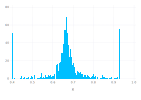

In [509]:
plot(x=G[:,1], Geom.histogram)

In [510]:
summarystats(G[:,1])

Summary Stats:
Length:         1000
Missing Count:  0
Mean:           0.668861
Minimum:        0.400000
1st Quartile:   0.643750
Median:         0.666000
3rd Quartile:   0.692000
Maximum:        0.930000


In [511]:
@show var(G[:, 1])
@show std(G[:, 1])

var(G[:, 1]) = 0.01120041209109109
std(G[:, 1]) = 0.10583199937207598


0.10583199937207598